# Home Credit Default Risk using Newton Sketch Logistic Regression

**Group Member:**\
Yahui Li(917797914)\
Jieyun Wang(9177814831)\
Siyao Wang(917856208)\
Ruichen Xu(917858772)

## 1 Newton Sketch Method Description
### 1.1 Newton Sketch for Logistic Regression

The Logistic Regression model represents the class-conditional probabilities through a linear function of the predictors 
\begin{align}
Pr(Y=1|X_i)&= \frac{e^{X_i^\top \beta}}{1 + e^{X_i^\top \beta}}\\
Pr(Y=0|X_i)&= \frac{1}{1 + e^{X_i^\top \beta}}.
\end{align}
Then we want to maximize the log likelihood
\begin{align}
\sum_{i=1}^n \left\lbrace Y_i(\beta_0+\sum_{k=1}^{ p}\beta_kX_{k,i})-\log(1+\exp(\beta_0+\sum_{k=1}^{ p}\beta_kX_{k,i}))\right\rbrace.
\end{align}
and minimize the negative log likelihood
\begin{align}
\sum_{i=1}^n \left\lbrace -Y_i(\beta_0+\sum_{k=1}^{ p}\beta_kX_{k,i})+\log(1+\exp(\beta_0+\sum_{k=1}^{ p}\beta_kX_{k,i}))\right\rbrace.
\end{align}
Therefore, the objective function is
\begin{align}
f(\beta)= \sum_{i=1}^n \left\lbrace -Y_i(X_i^\top\beta)+\log(1+\exp(X_i^\top\beta)\right\rbrace .
\end{align}
Recall the standard form of Newton's algorithm: with the help of second order Taylor expansion, given a current iterate $\widetilde{\beta}^{t}$, then we will get the iterate $\widetilde{\beta}^{t+1}$,
\begin{align}
\widetilde{\beta}^{t+1} = \mathbf{argmin}_{\beta \in \mathbb{R}^{p+1}} \left\lbrace\frac 12 \left\langle\beta - \widetilde{\beta}^t, \nabla^2 f(\widetilde{\beta}^t)(\beta - \widetilde{\beta}^t) \right\rangle + \left\langle\nabla f(\widetilde{\beta}^t), \beta - \widetilde{\beta}^t  \right\rangle\right\rbrace
\end{align}
We know 
\begin{align}
\nabla f(\beta) = \sum_{i = 1}^n \left(-Y_i X_i + \frac{ \exp(X_i^T\beta)}{1+ \exp(X_i^T\beta)}X_i\right) = X^\top (- Y + E)
\end{align}
where $$E = \begin{bmatrix} \frac{\exp(X_1\beta)}{1+\exp(X_1\beta)}&\frac{\exp(X_2\beta)}{1+\exp(X_2\beta)}&\cdots&\frac{\exp(X_n\beta)}{1+\exp(X_n\beta)}\end{bmatrix}^\top.$$
Then, consider the Hessian matrix square root, $\nabla^2 f (\widetilde{\beta^t})^{1/2}$, which satisfies $$(\nabla^2 f (\widetilde{\beta^t})^{1/2})^\top \nabla^2 f (\widetilde{\beta^t})^{1/2} = \nabla^2 f (\widetilde{\beta^t}).$$ For Logistic Regression, 
\begin{align}
 \nabla^2 f (\widetilde{\beta^t})^{1/2} = diag \left\lbrace \frac{\sqrt{\exp(X_1^T \beta)}}{1 + \exp(X_1^T \beta)}, \frac{\sqrt{\exp(X_2^T \beta)}}{1 + \exp(X_2^T \beta)},\cdots,\frac{\sqrt{\exp(X_n^T \beta)}}{1 + \exp(X_n^T \beta)}\right\rbrace X
\end{align}
In terms of this notation, the ordinary Newton update can be re-written as
\begin{align}
\widetilde{\beta}^{t+1} = \mathbf{argmin}_{\beta \in \mathbb{R}^{p+1}} \left\lbrace\frac 12 \| \nabla^2 f(\widetilde{\beta}^t)^{1/2}(\beta - \widetilde{\beta}^t) \|_2^2 +\left\langle \nabla f(\widetilde{\beta}^t), \beta - \widetilde{\beta}^t \right\rangle\right\rbrace
\end{align}
The computational complex for updating the standard Newton is $\mathbb{O}(n d^2)$, while the computational complex for the sketched Newton updates is $\mathbb{O}(m d^2)$. When $n$ is very large, we could use sketched Newton updates and choose $m \ll n$. Then, the time we needed is decent.

Given the sketch dimension $m$, $S$ is an isotropic sketch matrix, which satisfy $\mathbb{E}[S^\top S] = I_n$. Let $S^t \in \mathbb{R}^{m*n}$ be an independent realization of a sketch matrix. The Newton Sketch generate the new iterate $\widetilde{\beta}^{t+1}$ by
\begin{align}
\widetilde{\beta}^{t+1} = \mathbf{argmin}_{\beta \in \mathbb{R}^{p+1}} \left\lbrace\frac 12 \| S^t \nabla^2 f(\widetilde{\beta}^t)^{1/2}(\beta - \widetilde{\beta}^t) \|_2^2 + \left\langle\nabla f(\widetilde{\beta}^t), \beta - \widetilde{\beta}^t \right\rangle \right\rbrace
\end{align}
We denote $\widetilde{S}^t = S^t \nabla^2 f(\widetilde{\beta}^t)^{1/2}$, where $\widetilde{\beta}^{t+1}$ should satisfy 
\begin{align}
    (\widetilde{S}^t)^\top \widetilde{S}^t (\widetilde{\beta}^{t+1} - \beta^{t}) + \nabla f(X, \beta^t) = 0,
\end{align}
By employing the conjugate gradient decent algorithm, we could solve the equation.

### 1.2 Newton Sketch for $l_2$ Penalized Logistic Regression

Then consider the $l_2$ Penalized Logistic Regression model. We maximize the penalized log likelihood
\begin{align}
\frac{1}{n}\sum_{i=1}^n \left\lbrace Y_i(\beta_0+\sum_{k=1}^{ p}\beta_kX_{k,i})-\log(1+\exp(\beta_0+\sum_{k=1}^{ p}\beta_kX_{k,i}))\right\rbrace - \lambda\sum_{k=1}^{p} \beta_k^2.
\end{align}
and minimize the penalized negative log likelihood
\begin{align}
\frac{1}{n}\sum_{i=1}^n \left\lbrace -Y_i(\beta_0+\sum_{k=1}^{p}\beta_kX_{k,i})+\log(1+\exp(\beta_0+\sum_{k=1}^{p}\beta_kX_{k,i}))\right\rbrace + \lambda\sum_{k=1}^{p} \beta_k^2.
\end{align}
Therefore, the objective function is
\begin{align}
f(\beta)= \frac{1}{n}\sum_{i=1}^n \left\lbrace -Y_i(X_i^\top\beta)+\log(1+\exp(X_i^\top\beta)\right\rbrace + \lambda\beta^\top \beta.
\end{align}
Following the procedure of Logistic Regression, 
\begin{align}
\nabla f(\beta) &=\frac{1}{n} \sum_{i = 1}^n (-Y_i X_i + \frac{ \exp(X_i^T\beta)}{1+ \exp(X_i^T\beta)}X_i) + 2\lambda \beta =\frac{1}{n} X^\top (- Y + E) + 2\lambda \beta\\
\nabla^2 f (\widetilde{\beta^t})^{1/2} &= diag \left\lbrace \frac{\sqrt{\exp(X_1^T \beta)}}{\sqrt{n}(1 + \exp(X_1^T \beta))},\cdots,\frac{\sqrt{\exp(X_n^T \beta)}}{\sqrt{n}(1 + \exp(X_n^T\beta))},\sqrt{2\lambda},\sqrt{2\lambda},\cdots,\sqrt{2\lambda} \right\rbrace \widetilde{X}
\end{align}
where $$\widetilde{X} =\begin{bmatrix} X & I_p\end{bmatrix}^\top.$$ Following the same procedures of Logistic Regression, we could get a sequence of iterates.

## 2 Data Description

The data is provided by Home Credit on [Kaggle](https://www.kaggle.com/c/home-credit-default-risk/overview), a service dedicated to provided lines of credit (loans) to the unbanked population. Our goal is to predict whether a client will repay a loan or have difficulty.

There are 7 different sources of data. In this project, we will work with 3 tables: “application_train.csv”, “bureau.csv” and “previous_application.csv”.

### 2.1 Combine Tables and Calculate Statistics

We first combine the three tables using “SK_ID_CURR”, and get the historical credit behavior statistics, which include number of CB reported credits, number of active CB reported credits, number of total days past due(CB), nearest application day before current application(CB), the longest remaining duration of CB credit, maximal amount overdue for all credits(CB), number of credit prolonged(CB), number of previous applications(HC) and number of previous applications approved(HC).

The dataset is stored in "/data/data_join.csv" for later use.

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
# File system manangement
import os
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%run ../code/data_munging_join.py

In [3]:
data = pd.read_csv('../data/data_join.csv')

### 2.2 Missing Values

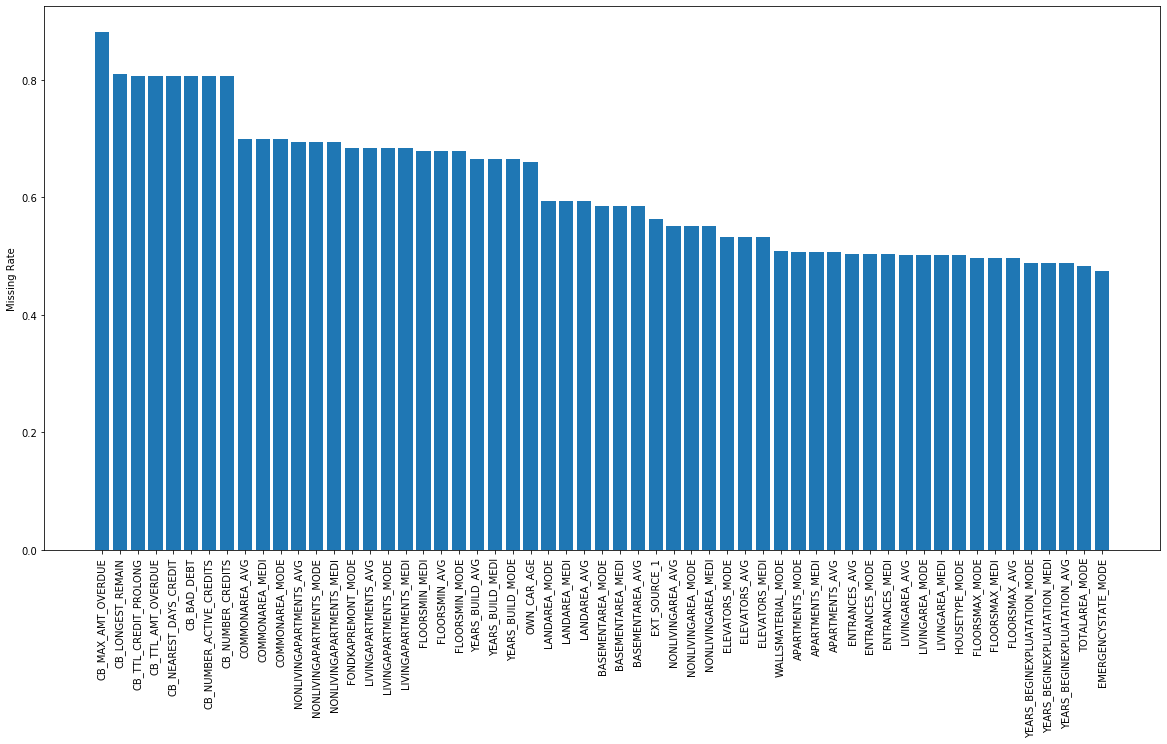

In [4]:
missing_rate = 1-data.describe(include='all').iloc[0,:]/data.shape[0]
top_missing = missing_rate.sort_values(ascending=False).head(57)
plt.figure(figsize=(20,10))
plt.bar(top_missing.index,top_missing)
plt.xticks(rotation=90)
plt.ylabel('Missing Rate')
plt.show()

Since most customers don't have records in Credit Bureau, we add an indicator 'CB_FLAG' to show whether a customer has CB records. We delete the cases where variables `CB_MAX_OVERDUE` and `COMMONAREA_MEDI` are missing. Some customers don't have a record in the Home Credit Previous Application, then we consider them as a new customer and add `HC_NEW_FLAG` to indicate this, with imputation of zero. Finally, we replace any other missing values with either median or `unknown` for numeric and categorical respectively.

In [5]:
%run ../code/data_munging_clean.py

In [6]:
# The data we cleaned is as below
data = pd.read_csv('../data/data_clean.csv')

### 2.3 Imbalance

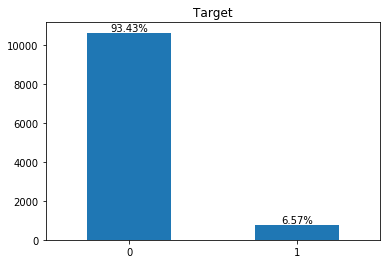

In [7]:
freq = data.TARGET.value_counts()/data.shape[0]
data.TARGET.value_counts().plot.bar()
plt.title('Target')
plt.xticks(rotation=0)
plt.text(0,data.TARGET.value_counts().values[0]+100,"{:.2f}%".format(freq[0]*100),horizontalalignment='center')
plt.text(1,data.TARGET.value_counts().values[1]+100,"{:.2f}%".format(freq[1]*100),horizontalalignment='center')
plt.show()

We notice the data is quite imbalanced, only $6.57\%$ of them are labeled as $1$, which stands for "client with payment difficulties". Therefore, once getting into more sophisticated machine learning models, we could reweight the classes by their representation in the data to reflect this kind of "imbalance".

### 2.4 Anomalies: DAYS_EMPLOYED



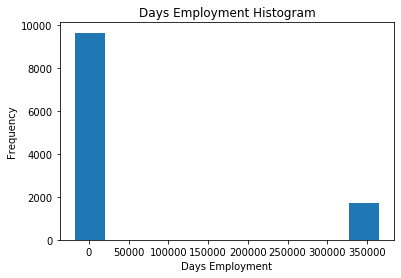

In [8]:
data['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

Without curiousity, let's subset the anomalous clients and see if they tend to have higher or lower rates of default than the rest of the clients.

In [9]:
anom = data[data['DAYS_EMPLOYED'] == 365243]
non_anom = data[data['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 6.82% of loans
The anomalies default on 5.16% of loans
There are 1726 anomalous days of employment


### 2.5 Correlations

#### 2.5.1 Age

In [10]:
# Find correlations with the target and sort
correlations = data.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DAYS_LAST_PHONE_CHANGE         0.036282
CB_LONGEST_REMAIN              0.037328
REGION_RATING_CLIENT_W_CITY    0.038498
CB_NEAREST_DAYS_CREDIT         0.042852
DAYS_ID_PUBLISH                0.047327
DAYS_BIRTH                     0.057568
CB_NUMBER_ACTIVE_CREDITS       0.059257
TARGET                         1.000000
FLAG_MOBIL                          NaN
FLAG_DOCUMENT_2                     NaN
FLAG_DOCUMENT_4                     NaN
FLAG_DOCUMENT_10                    NaN
FLAG_DOCUMENT_12                    NaN
CB_FLAG                             NaN
HC_NEW_FLAG                         NaN
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3      -0.159156
EXT_SOURCE_2      -0.139765
EXT_SOURCE_1      -0.104797
FLOORSMAX_AVG     -0.041880
FLOORSMAX_MODE    -0.040934
FLOORSMAX_MEDI    -0.040863
AMT_GOODS_PRICE   -0.040827
FLOORSMIN_AVG     -0.032354
FLOORSMIN_MEDI    -0.031893
FLOORSMIN_MODE    -0.031223
AMT_CREDIT        -0.030779
ELEV

`DAYS_BIRTH` is the age in days of the client at the time of the loan in negative days. `DAYS_BIRTH` seems to have positive correlation with the response variable, which means that as the client gets older, they are less likely to default on their loan (i.e. the target == 0).

In [11]:
import seaborn as sns
data['DAYS_BIRTH'] = abs(data['DAYS_BIRTH'])

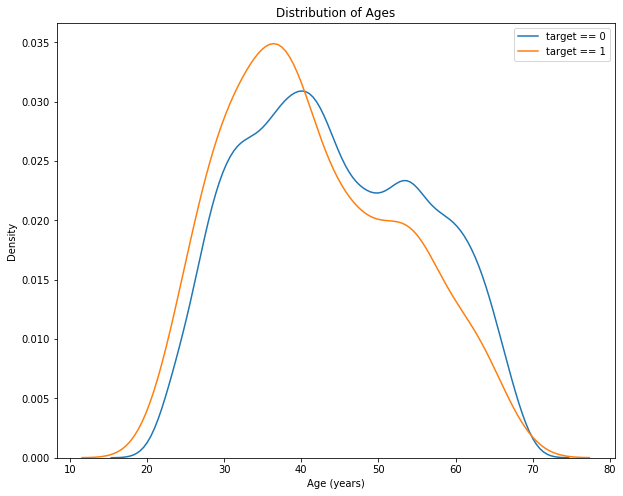

In [12]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(data.loc[data['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(data.loc[data['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

The target == 1 curve skews towards the younger. Although this is not a significant correlation, this variable is likely to be useful in the machine learning model because it does affect the target. Let's look at this relationship in another way: averaging failure to repay loans by age bracket.

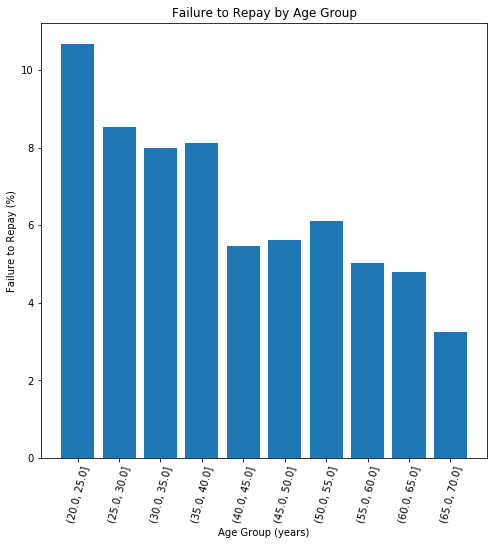

In [13]:
# Age information into a separate dataframe
age_data = data[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))

# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()

plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

This information could be directly implemented by the bank: because the younger clients are less likely to repay the loan, they should be provided with more guidance or financial planning tips. This does not mean that the bank should discriminate against younger clients, but it would be smart to take precautionary measures to help younger clients pay on time.

#### 2.5.2 Exterior Sources

The 3 variables with the strongest negative correlations with the target are `EXT_SOURCE_1`, `EXT_SOURCE_2`, and `EXT_SOURCE_3`. According to the documentation, these features represent a "normalized score from external data source". It may be a cumulative sort of credit rating made by using numerous sources of data.

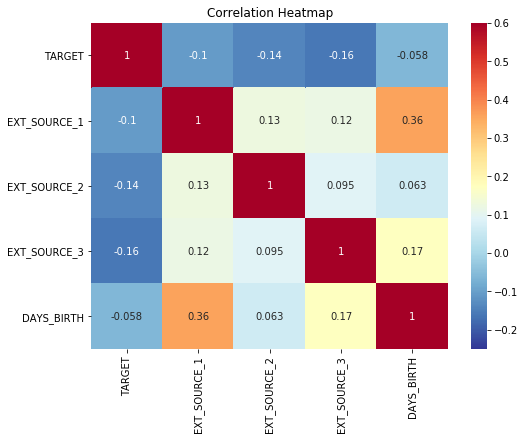

In [14]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = data[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()

plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

All three `EXT_SOURCE` features have negative correlations with the target, indicating that as the value of the `EXT_SOURCE` increases, the client tends to repay the loan. 

## 3 Data Pre-processing

In this part, we will split data into training and test parts. After transformation, we build our Logistic Regression model with Newton Sketch method, and test how well it performs. We also compare it with the Logistic Regression solved by SKlearn.

### 3.1 Encoding Categorical Variables

Because many features are categorical, we need to set them as dummy variables for data analysis purpose.

In [15]:
# Number of each type of column
data.dtypes.value_counts()

float64    75
int64      42
object     16
dtype: int64

In [16]:
# Number of unique classes in each object column
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                8
NAME_INCOME_TYPE               5
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               19
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             57
FONDKAPREMONT_MODE             5
HOUSETYPE_MODE                 4
WALLSMATERIAL_MODE             8
EMERGENCYSTATE_MODE            2
dtype: int64

Most of the categorical variables have a relatively small number of unique entries. For any categorical variable (type == object) with 2 unique categories, we will use label encoding, and for those with more than 2 unique categories, we will use one-hot encoding. For label encoding, we use the Scikit-Learn LabelEncoder and for one-hot encoding, the pandas get_dummies(df) function.

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in data:
    if data[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(data[col].unique())) <= 2:
            # Train on the training data
            le.fit(data[col])
            # Transform both training and test data
            data[col] = le.transform(data[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

5 columns were label encoded.


In [19]:
# one-hot encoding of categorical variables
data = pd.get_dummies(data)

print('Training Features shape: ', data.shape)

Training Features shape:  (11360, 251)


### 3.2 Splitting, Imputation and Standarization

In this part, we will split data into training and test sets. Since we have more than $10,000$ cases, we will randomly select $10\%$ of the data as the test set. As a result, we have $10,224$ cases in the training set and $1,136$ cases in the test set, with $251$ features. Then we impute the numeric missing values by medians.

In [20]:
%run ../code/data_train_test.py

# split
X_tr, y_tr, X_te, y_te = data_split(data, test_size = 0.1, random_state = 10)
# imputate
X_tr,X_te = data_impute(X_tr, X_te, starategy = 'median')
# standardize
Xd_tr, Xd_te = data_standardize(X_tr,X_te)

## 4 Model Implementation

In this part, we apply the Newton Sketch Logistic Regression on the real data of Home Credit. We apply both Logistic Regression and $l_2$ Penalized Logistic Regression. 

### 4.1 Newton Sketch Logistic Regression

For Newton Sketch Logistic Regression, we apply different sketch dimensions(m), track the number of iteration, runtime, Hessian matrix, and compare the estimated beta with the beta that we get from Sklearn Logistic Regression using newton-cg solver. In this part, we use the standardized dataset and a model without the intercept.

In [21]:
%run ../code/ComparisonResult.py
# list of different m to track number of iteration, runtime, accuracy and beta
mrange= list(set(range(50,250,50)).union(set(range(250,10001,250))))
mrange.sort()
# list of different m to track hessian
mrange_h= [250,500,1000,2000,3000,4000,6000,8000]

In [22]:
# logistic regression with no penalty of different m
# store the results of iteration, runtime, estimated beta and hessian
path = '../data/SN_None_'
CompareSketchNewton(Xd_tr, y_tr,Xd_te,y_te,path,sketch_dim = mrange, 
                    random_state = 3,tol=10**(-4))
# store the results of hessian
track_hessian(sketch_dim = mrange_h,random_state = 3,X_tr = Xd_tr, y_tr = y_tr, 
              path = '../data/SN_None_Hessian.csv',tol = 10**(-4))

50 Failed to converge
100 Failed to converge
150 Failed to converge
200 Failed to converge
250 500 750 1000 1250 1500 1750 2000 2250 2500 2750 3000 3250 3500 3750 4000 4250 4500 4750 5000 5250 5500 5750 6000 6250 6500 6750 7000 7250 7500 7750 8000 8250 8500 8750 9000 9250 9500 9750 10000 250 500 1000 2000 3000 4000 6000 8000 

In [24]:
#read the file that store iteration, runtime, accuracy
SN_None_ira = pd.read_csv('../data/SN_None_ira.csv', index_col=0)
#read the file that store beta
SN_None_beta = pd.read_csv('../data/SN_None_beta.csv', index_col=0)
#read the file that store hessian
SN_None_Hessian = pd.read_csv('../data/SN_None_Hessian.csv', index_col=0)

* **Number of Iteration and Runtime**

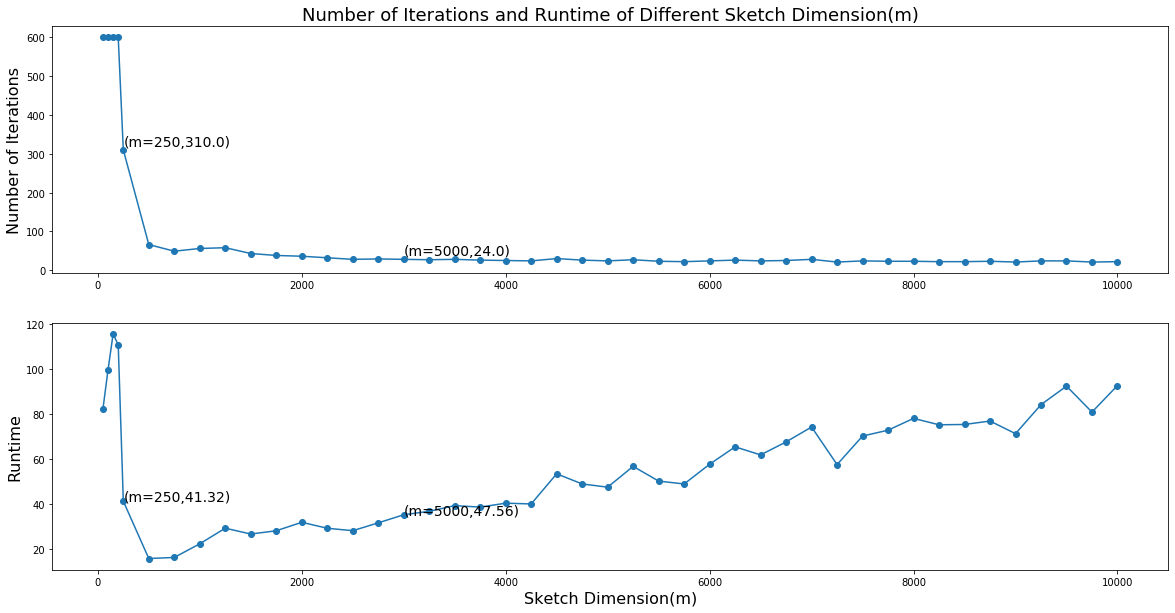

In [25]:
SN_None_iteration = SN_None_ira.iloc[0,:].values
SN_None_runtime = SN_None_ira.iloc[1,:].values
#plot iteration
plt.figure(figsize = (20, 10))
plt.subplot(2, 1, 1)
plt.scatter(mrange,SN_None_iteration)
plt.plot(mrange,SN_None_iteration)
plt.text(mrange[4], SN_None_iteration[4]+10, 
         '(m='+str(mrange[4])+','+str(SN_None_iteration[4])+')', fontsize=14)
plt.text(mrange[15], SN_None_iteration[15]+10, 
         '(m='+str(mrange[23])+','+str(SN_None_iteration[23])+')', fontsize=14)
plt.ylabel('Number of Iterations', fontsize=16)
plt.title('Number of Iterations and Runtime of Different Sketch Dimension(m)', fontsize=18)
#plot runtime
plt.subplot(2, 1,2 )
plt.scatter(mrange,SN_None_runtime)
plt.plot(mrange,SN_None_runtime)
plt.text(mrange[4], SN_None_runtime[4], 
         '(m='+str(mrange[4])+','+str(round(SN_None_runtime[4],2))+')', fontsize=14)
plt.text(mrange[15], SN_None_runtime[15], 
         '(m='+str(mrange[23])+','+str(round(SN_None_runtime[23],2))+')', fontsize=14)
plt.xlabel('Sketch Dimension(m)', fontsize=16)
plt.ylabel('Runtime', fontsize=16)
plt.show()

For the Logistic Regression model, the first plot shows that when $m$ is less than 250, the algorithm fails to converge within 600 iterations. That is to say, when the $m$ is very small, we are unable to get a stable result within a samll number of iterations. A reasonable choice of the minimum $m$ could be $250$, which is close to the number of the predictive variables($p$).

* **Hessian Matrix**

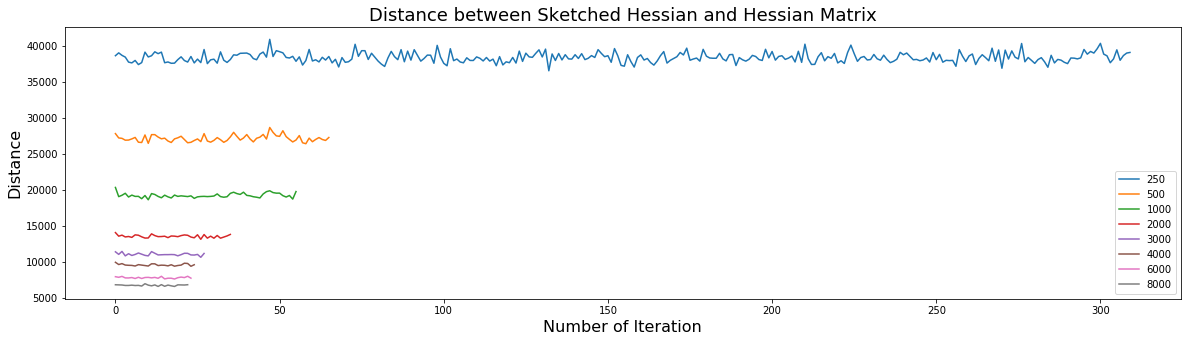

In [26]:
plt.figure(figsize = (20, 5))
# use Frobenius Norm  
F_Norm = SN_None_Hessian**0.5
plt.plot(F_Norm)
plt.legend(labels=list(F_Norm.columns),  loc='best')
plt.xlabel('Number of Iteration', fontsize=16)
plt.ylabel('Distance', fontsize=16)
plt.title('Distance between Sketched Hessian and Hessian Matrix', fontsize=18)
plt.show()

The distance is the Frobenius norm between Sketched Hessian and Hessian Matrix. We can observe that when $m$ increases, the distance becomes smaller, which means the Sketched Hessian is closer to the Hessian Matrix. With the increase of the sketch dimension, the decrement of distance becomes smaller. So, choosing a very larger sketch dimension is not necessary. 

* **Estimated Beta**

In [27]:
# Logistic Regression by Newton Method in sklearn
from sklearn.linear_model import LogisticRegression
# Make the model with the specified regularization parameter
log_reg = LogisticRegression(penalty = 'none',tol=0.0001, solver='newton-cg', max_iter=600,fit_intercept = False)
# Train on the training data
log_reg.fit(Xd_tr, y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=600,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

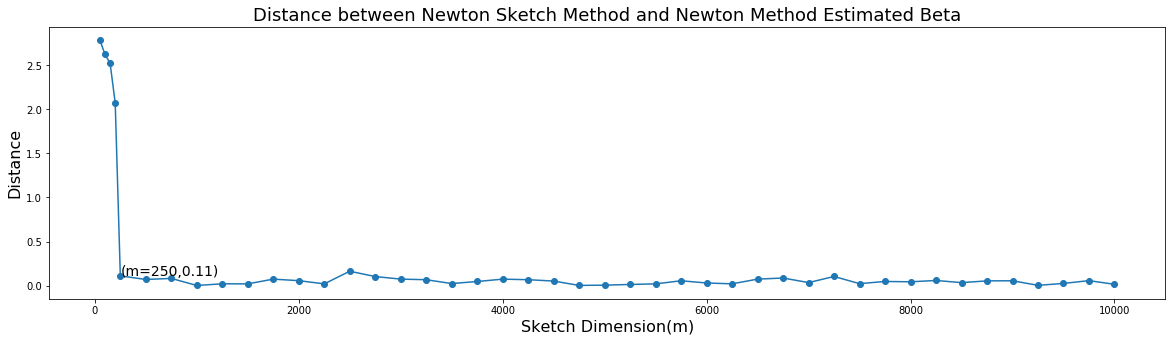

In [28]:
# calculate the distance between Newton Sketch Method and Newton Method Estimated Beta
beta_d = [(np.sum(np.array(SN_None_beta.iloc[:,i])-log_reg.coef_)**2)**0.5 
          for i in range(len(mrange))]
#plot
plt.figure(figsize = (20, 5))
plt.scatter(mrange,beta_d)
plt.plot(mrange,beta_d)
plt.text(mrange[4], beta_d[4], 
         '(m='+str(mrange[4])+','+str(round(beta_d[4],2))+')', fontsize=14)
plt.xlabel('Sketch Dimension(m)', fontsize=16)
plt.ylabel('Distance', fontsize=16)
plt.title('Distance between Newton Sketch Method and Newton Method Estimated Beta', fontsize=18)
plt.show()

The distance is measured by the Frobenius norm between the Sketched Hessian and Hessian. We can observe that when $m$ increases, such distance becomes smaller, which means the Hessian is better approximated by the Sketched form. With the increase of the sketch dimension, the decrement of distance becomes smaller. Thus, a large sketch dimension is unnecessary.

### 4.2 Newton Sketch for $l_2$ Penalized Logistic Regression

We also apply $l_2$ Penalized Logistic Regression for different sketch dimensions(m) and different $\lambda$s, and track the number of iteration, runtime, and Hessian matrix. In this part, we also use the standardized dataset and a model without the intercept.

In [30]:
# L2-penalized of different m and use differnet lambda(lamb_p)
# store the results of iteration, runtime, estimated beta and hessian
lamb_p=0.001
path = '../data/SN_Ridge_'+str(lamb_p)+'_'
CompareSketchNewton(Xd_tr, y_tr,Xd_te,y_te,path,sketch_dim = mrange, random_state = 3,
                    tol=10**(-4),penalty='Ridge',lamb_p=lamb_p)
# store the results of hessian
track_hessian(sketch_dim = mrange_h,random_state = 3,X_tr = Xd_tr, y_tr = y_tr, 
              path = '../data/SN_Ridge_Hessian.csv',tol = 10**(-4),penalty ='Ridge',lamb_p=lamb_p)

50 100 150 200 250 500 750 1000 1250 1500 1750 2000 2250 2500 2750 3000 3250 3500 3750 4000 4250 4500 4750 5000 5250 5500 5750 6000 6250 6500 6750 7000 7250 7500 7750 8000 8250 8500 8750 9000 9250 9500 9750 10000 250 500 1000 2000 3000 4000 6000 8000 

In [31]:
# read data store for different lambda 0.0005-0.1
import os
filesdir = '../data/'
SN_R_iteration = pd.DataFrame()
SN_R_runtime = pd.DataFrame()
for file in os.listdir(filesdir):
    if file.startswith("SN_Ridge") and file.endswith("ira.csv"):
        SN_R_ira = pd.read_csv('../data/'+file, index_col=0)
        SN_R_iteration[file.split('_')[2]] = SN_R_ira.iloc[0,:].values
        SN_R_runtime[file.split('_')[2]] = SN_R_ira.iloc[1,:].values  
# order by column name
SN_R_iteration.sort_index(axis=1,inplace=True)
SN_R_runtime.sort_index(axis=1,inplace=True)

#read hessian
#read the file that store hessian
SN_R_Hessian = pd.read_csv('../data/SN_Ridge_Hessian.csv', index_col=0)

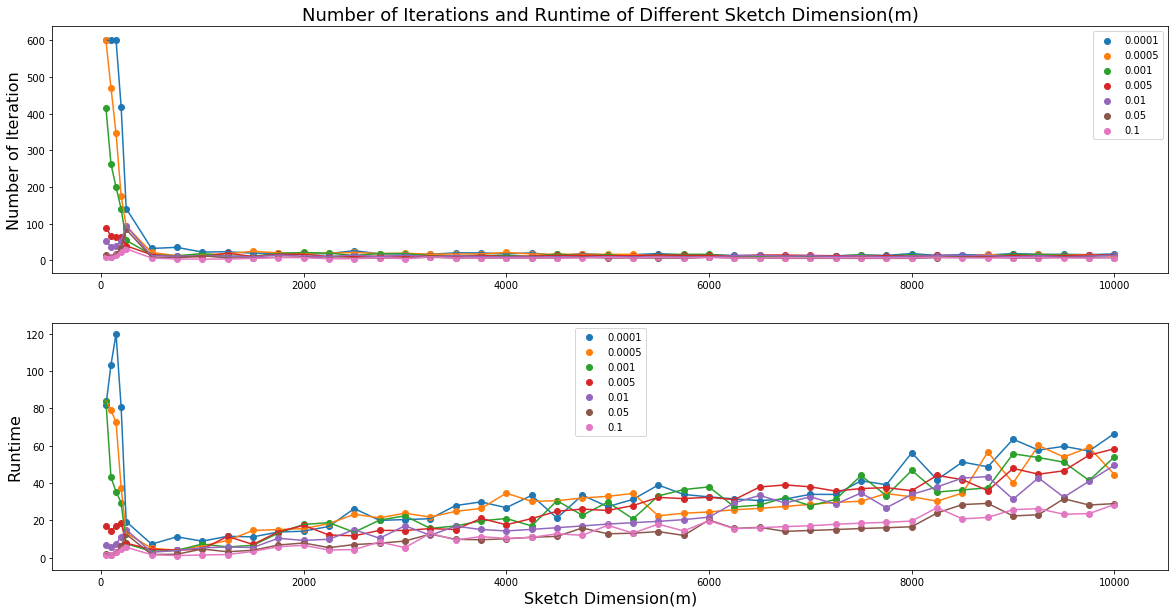

In [32]:
plt.figure(figsize = (20, 10))
#plot iteration
plt.subplot(2, 1, 1)
for i in range(7):
    plt.scatter(mrange,SN_R_iteration.iloc[:,i],label=SN_R_iteration.columns[i])
    plt.plot(mrange,SN_R_iteration.iloc[:,i])
plt.legend(loc='best')
plt.ylabel('Number of Iteration', fontsize=16)
plt.title('Number of Iterations and Runtime of Different Sketch Dimension(m)', fontsize=18)
#plot runtime
plt.subplot(2, 1, 2)
for i in range(7):
    plt.scatter(mrange,SN_R_runtime.iloc[:,i],label=SN_R_runtime.columns[i])
    plt.plot(mrange,SN_R_runtime.iloc[:,i])
plt.legend(loc='best')
plt.xlabel('Sketch Dimension(m)', fontsize=16)
plt.ylabel('Runtime', fontsize=16)
plt.show()

The plot shows that for $l_2$ Penalized Logistic Regression model, when the $m$s and $\lambda$s are very small, the sequence of iterates $\{\beta^{t}\}_{t=1}^{\infty}$ is difficult to converge. But when $m$ is small and $\lambda$ is relatively big, it converges too fast. When $m$ is larger than 250, the trends of different $\lambda$ are more similar and steady. Thus it is reasonable to choose $m=250$ and above.

* **Hessian**

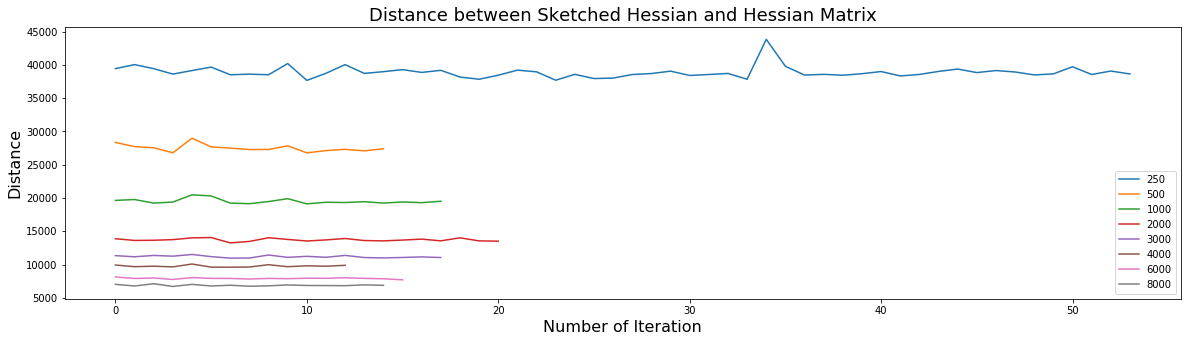

In [33]:
plt.figure(figsize = (20, 5))
# use Frobenius Norm  
F_Norm = SN_R_Hessian**0.5
plt.plot(F_Norm)
plt.legend(labels=list(F_Norm.columns),  loc='best')
plt.xlabel('Number of Iteration', fontsize=16)
plt.ylabel('Distance', fontsize=16)
plt.title('Distance between Sketched Hessian and Hessian Matrix', fontsize=18)
plt.show()

This plot is similar to the corresponding plot from logistic regression, thus, the conclusion above also applies here.  

## 5 Performance Comparison

In this part, we would like to compare the performance of Newton Sketch Logistic Regression against Logistic Regression and SVM from Sklearn. We include intercept in all of the models. 

### 5.1 Newton Sketch Logistic Regression

In [34]:
import timeit

start = timeit.default_timer()

NS_log_reg_1 = SketchedNewtonLogistic(sketch_dim = 250, fit_intercept = True, tol=10**(-4), random_state = 3)
NS_log_reg_1.fit(Xd_tr,y_tr)
NS_log_reg_1_accuracy = (NS_log_reg_1.predict(Xd_te) == y_te).mean()

stop = timeit.default_timer()

print('The running time is: ', stop - start)  
print("The accuracy of Newton Sketched Logistic Regression without penalty is:",NS_log_reg_1_accuracy)

The running time is:  29.66359275600007
The accuracy of Newton Sketched Logistic Regression without penalty is: 0.9375


In [35]:
from sklearn import metrics
score_1 = np.concatenate([np.ones(Xd_te.shape[0]).reshape(-1,1),Xd_te],axis = 1)@ NS_log_reg_1.beta
fpr_1, tpr_1, threshs_1 = metrics.roc_curve(y_te,score_1)
prec_1, rec_1, threshs_1 = metrics.precision_recall_curve(y_te,score_1)

In [36]:
from sklearn.linear_model import LogisticRegression

start = timeit.default_timer()
# Make the model with the specified regularization parameter
log_reg_1 = LogisticRegression(penalty = 'none',tol=10**(-4), solver='newton-cg', max_iter=600,fit_intercept = True)
log_reg_1.fit(Xd_tr,y_tr)

# Make predictions
# Make sure to select the second column only
log_reg_pred_1 = log_reg_1.predict_proba(Xd_te)[:, 1]

# calculate the accuracy
log_reg_accuracy_1 = np.mean(np.where(log_reg_pred_1>0.5, 1, 0) == y_te)

stop = timeit.default_timer()

print('The running time is: ', stop - start)  
print("The accuracy of Logistic Regression in Sklearn without penalty is:",log_reg_accuracy_1)

The running time is:  8.802217467000446
The accuracy of Logistic Regression in Sklearn without penalty is: 0.9375


In [37]:
score_2 = X_te @ log_reg_1.coef_[0,:]
fpr_2, tpr_2, threshs_2 = metrics.roc_curve(y_te,score_2)
prec_2, rec_2, threshs_2 = metrics.precision_recall_curve(y_te,score_2)

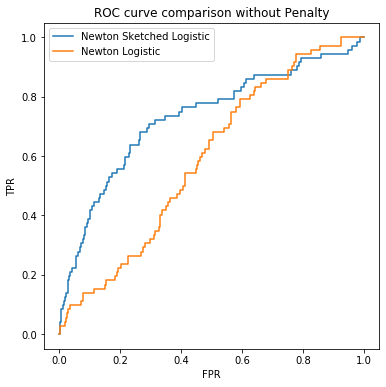

In [38]:
plt.figure(figsize=(6,6))
plt.plot(fpr_1,tpr_1,label='Newton Sketched Logistic')
plt.plot(fpr_2,tpr_2,label='Newton Logistic')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title("ROC curve comparison without Penalty")
plt.show()

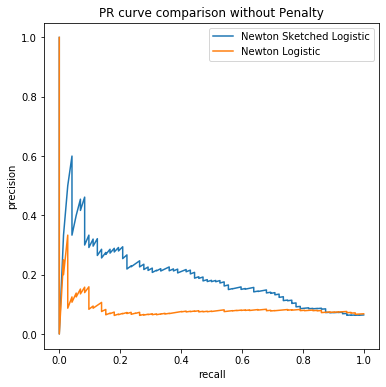

In [39]:
plt.figure(figsize=(6,6))
plt.plot(rec_1,prec_1,label='Newton Sketched Logistic')
plt.plot(rec_2,prec_2,label='Newton Logistic')
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend()
plt.title("PR curve comparison without Penalty")
plt.show()

From ROC and PR curve, the Newton Sketched Logistic Regression has a better performance than Logistic Regression in Sklearn.

### 5.2 Newton Sketch for $l_2$ Penalized Logistic Regression

In [40]:
start = timeit.default_timer()

NS_log_reg_2 = SketchedNewtonLogistic(sketch_dim = 250, fit_intercept = True, tol=10**(-4), 
                                      penalty = 'Ridge', lamb_p=0.001,random_state = 3)
NS_log_reg_2.fit(Xd_tr,y_tr)
NS_log_reg_2_accuracy = (NS_log_reg_2.predict(Xd_te) == y_te).mean()

stop = timeit.default_timer()

print('The running time is: ', stop - start)  
print("The accuracy of Newton Sketched Logistic Regression with L2 penalty is:",NS_log_reg_2_accuracy)

The running time is:  6.080944387000272
The accuracy of Newton Sketched Logistic Regression with L2 penalty is: 0.9357394366197183


In [41]:
score_3 = np.concatenate([np.ones(Xd_te.shape[0]).reshape(-1,1),Xd_te],axis = 1)@ NS_log_reg_2.beta
fpr_3, tpr_3, threshs_3 = metrics.roc_curve(y_te,score_3)
prec_3, rec_3, threshs_3 = metrics.precision_recall_curve(y_te,score_3)

In [42]:
start = timeit.default_timer()

# Make the model with the specified regularization parameter
log_reg_2 = LogisticRegression(penalty = 'l2',tol=10**(-4), solver='newton-cg', C = 0.001, max_iter=600,fit_intercept = True)
log_reg_2.fit(Xd_tr,y_tr)

# Make predictions
# Make sure to select the second column only
log_reg_pred_2 = log_reg_2.predict_proba(Xd_te)[:, 1]

# calculate the accuracy
log_reg_accuracy_2 = np.mean(np.where(log_reg_pred_2>0.5, 1, 0) == y_te)

stop = timeit.default_timer()

print('The running time is: ', stop - start)  
print("The accuracy of Logistic Regression in Sklearn with L2 penalty is:",log_reg_accuracy_2)

The running time is:  0.2547535119992972
The accuracy of Logistic Regression in Sklearn with L2 penalty is: 0.9366197183098591


In [43]:
score_4 = X_te @ log_reg_2.coef_[0,:]
fpr_4, tpr_4, threshs_4 = metrics.roc_curve(y_te,score_4)
prec_4, rec_4, threshs_4 = metrics.precision_recall_curve(y_te,score_4)

In [44]:
from sklearn.svm import SVC
start = timeit.default_timer()
svc = SVC(C = 0.001,kernel='linear')
svc.fit(Xd_tr,y_tr)
svc.pred = svc.predict(Xd_te)
svc_accuracy = (svc.pred == y_te).mean()
stop = timeit.default_timer()

print('The running time is: ', stop - start)  
print("The accuracy of SVM is:",svc_accuracy)

The running time is:  8.651099144
The accuracy of SVM is: 0.9366197183098591


In [45]:
yhat = svc.predict(Xd_te)
score_svc = Xd_te @ svc.coef_[0,:]
fpr_svc, tpr_svc, threshs = metrics.roc_curve(y_te,score_svc)
prec_svc, rec_svc, threshs = metrics.precision_recall_curve(y_te,score_svc)

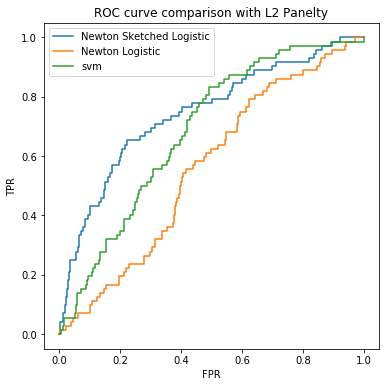

In [46]:
plt.figure(figsize=(6,6))
plt.plot(fpr_3,tpr_3,label='Newton Sketched Logistic')
plt.plot(fpr_4,tpr_4,label='Newton Logistic')
plt.plot(fpr_svc,tpr_svc,label='svm')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title("ROC curve comparison with L2 Panelty")
plt.show()

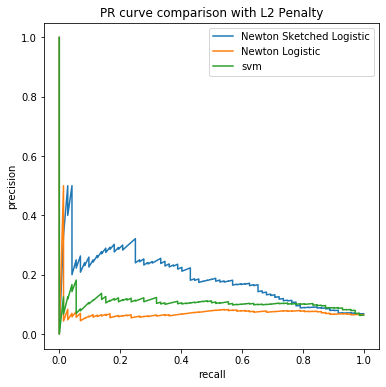

In [47]:
plt.figure(figsize=(6,6))
plt.plot(rec_3,prec_3,label='Newton Sketched Logistic')
plt.plot(rec_4,prec_4,label='Newton Logistic')
plt.plot(rec_svc,prec_svc,label='svm')
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend()
plt.title("PR curve comparison with L2 Penalty")
plt.show()

Although the accuracy of Newton Sketch Method is slightly lower, the ROC and PR curves tell us our model has a better performance than Logistic Regression or SVM in SKlearn. Thus, our model can perform as well as the Logistic Regression in Sklearn. Besides, the regression model with $l_2$ penalty consumed less time and still get high accuracy. Thus, to make predictions, we can use the Newton Sketch Logistic Regression with a $l_2$ penalty.

## 6 Conclusion 

IIn a nutshell, Newton Sketch could be used to solve Logistic Regression and $l_2$ Penalized Logistic Regression, with a benefit of greatly reducing the computation needs for Hessian matrix. The sketch dimension can be chosen close to the number of predictors. Due to time limits, we downsized the dataset, for further investigation, we could apply our algorithm on a larger dataset. Besides, it could also be interesting to investigate its usage in $l_1$ penalized logistic regression and Multinomial Regression.

# Reference

1. M, Wainwright M J. Newton sketch: A near linear-time optimization algorithm with linear-quadratic convergence[J]. SIAM Journal on Optimization, 2017, 27(1): 205-245.

1. Friedman J, Hastie T, Tibshirani R. Regularization paths for generalized linear models via coordinate descent[J]. Journal of statistical software, 2010, 33(1): 

1. https://github.com/huisaddison/newton-sketch

1. https://github.com/scikit-learn/scikit-learn

1. https://www.kaggle.com/c/home-credit-default-risk/overview